# Week 11 - Clustering: Part 2

In [1]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 9.2 MB/s  0:00:016m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

## First Dataset: Acute Kidney

In [3]:
# 1) Load data
url = "https://raw.githubusercontent.com/muathdb/Week4/main/Acute%20Kidney.csv"
df = pd.read_csv(url)

# Basic cleaning: normalize column names
df.columns = (df.columns.astype(str)
              .str.strip()
              .str.replace(r"\s+", "_", regex=True)
              .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
              .str.lower())

X shape after numeric selection & dropna: (1185, 54)

🧱 DBSCAN Cluster Counts:
dbscan_cluster
-1    1185
Name: count, dtype: int64

🌲 HAC (Ward) Cluster Counts:
hac_cluster
0    409
1    603
2    173
Name: count, dtype: int64


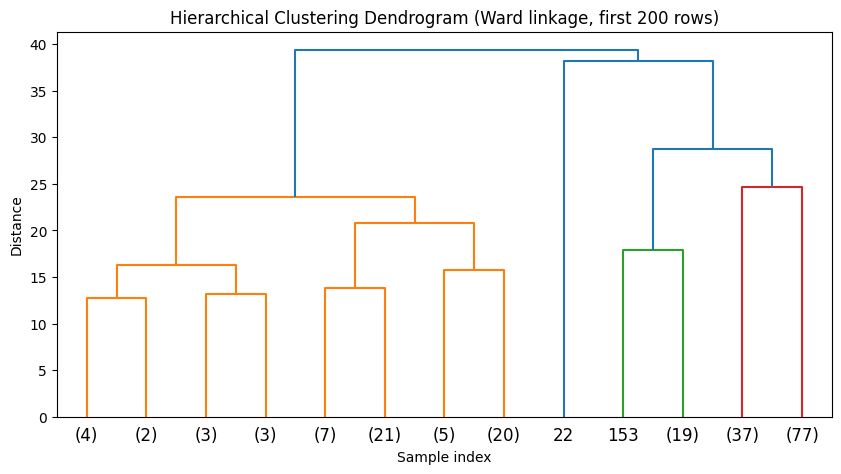

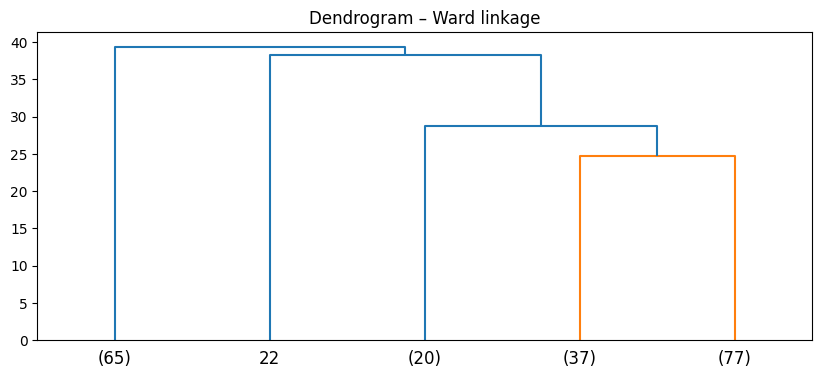

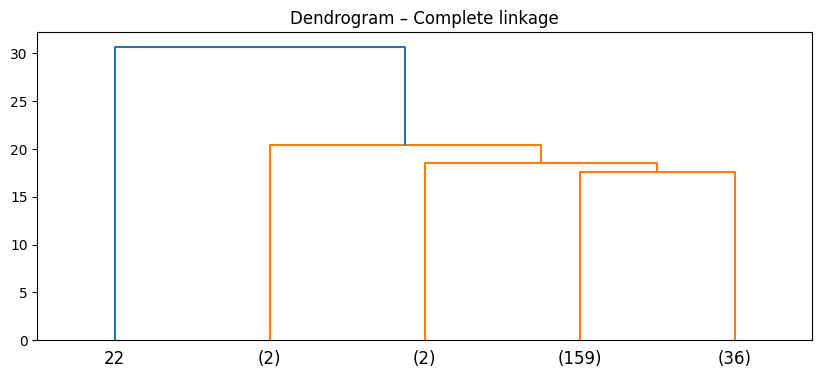

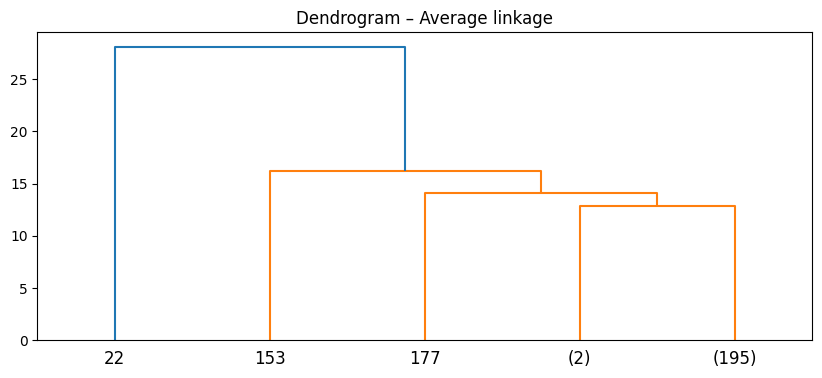

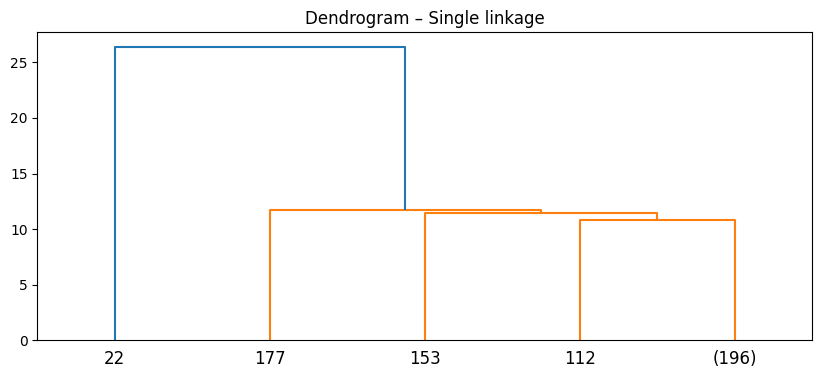


🔍 DBSCAN Clusters:
                  age    bmi  weight      t      p      r     bp  \
dbscan_cluster                                                     
-1              66.11  29.81   85.88  36.92  89.58  20.27  76.63   

                vent_firstday  vaso_firstday   chf  ...    ph      cl      na  \
dbscan_cluster                                      ...                         
-1                       0.77           0.55  0.28  ...  7.33  105.18  138.46   

                   k  bicarbonate   scr    bun     po2   pco2  lactate  
dbscan_cluster                                                          
-1              4.25        21.81  1.74  35.34  155.74  42.81     2.67  

[1 rows x 54 columns]

🔍 HAC Clusters (Ward):
               age    bmi  weight      t      p      r     bp  vent_firstday  \
hac_cluster                                                                    
0            70.87  27.49   78.12  36.82  92.20  20.92  74.59           0.80   
1            61.47  31.41

In [4]:
target_col = 'aki'  # ⬅️ Change if different label or drop if no label exists

if target_col in df.columns:
    X = df.drop(columns=[target_col])
else:
    X = df.copy()

# Keep numeric only & drop NA rows
X = X.select_dtypes(include=[np.number]).dropna()
print("X shape after numeric selection & dropna:", X.shape)

# Store rows used in clustering
df_cluster = df.loc[X.index].copy()

# ================================
# 2️⃣ FEATURE SCALING (MANDATORY)
# ================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# 3️⃣ DENSITY-BASED CLUSTERING (DBSCAN)
# ==========================================
# DBSCAN parameters:
eps = 0.5    # ⬅️ Adjust depending on data density
min_samples = 10  # Min points needed to form a dense cluster

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Attach DBSCAN labels (-1 = noise)
df_cluster['dbscan_cluster'] = labels_dbscan
print("\n🧱 DBSCAN Cluster Counts:")
print(df_cluster['dbscan_cluster'].value_counts().sort_index())

# ==========================================
# 4️⃣ HIERARCHICAL AGGLOMERATIVE CLUSTERING
# ==========================================
# Let's try 3 clusters using Ward linkage (minimizes intra-cluster variance)
hac_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hac = hac_model.fit_predict(X_scaled)

df_cluster['hac_cluster'] = labels_hac
print("\n🌲 HAC (Ward) Cluster Counts:")
print(df_cluster['hac_cluster'].value_counts().sort_index())

# ==========================================
# 5️⃣ DENDROGRAM (FULL LINKAGE VISUAL)
# ==========================================
plt.figure(figsize=(10, 5))
Z = linkage(X_scaled[:200], method='ward')  # sample to reduce plot size
plt.title("Hierarchical Clustering Dendrogram (Ward linkage, first 200 rows)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(Z, truncate_mode="level", p=3)  # simplifies output
plt.show()

# ==========================================
# 6️⃣ OPTIONAL: Compare Linkage Methods
# ==========================================
methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    Z = linkage(X_scaled[:200], method=method)
    plt.figure(figsize=(10, 4))
    plt.title(f"Dendrogram – {method.title()} linkage")
    dendrogram(Z, truncate_mode='lastp', p=5)
    plt.show()

# ==========================================
# 7️⃣ VIEW CLUSTER SUMMARIES
# ==========================================
print("\n🔍 DBSCAN Clusters:")
print(df_cluster.groupby('dbscan_cluster')[X.columns].mean().round(2))

print("\n🔍 HAC Clusters (Ward):")
print(df_cluster.groupby('hac_cluster')[X.columns].mean().round(2))

## Second Dataset: Colorectal cancer

In [5]:
# 1) Load and sample
URL = "https://raw.githubusercontent.com/muathdb/Week4/main/colorectal_cancer_dataset.csv"
df = pd.read_csv(URL)

df.columns = (
    pd.Index(df.columns)
    .astype(str).str.strip()
    .str.replace(r"\s+", "_", regex=True)
    .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
    .str.lower()
)
print(f"Rows: {len(df):,}  |  Columns: {df.shape[1]}")

Rows: 167,497  |  Columns: 28


Numeric X shape after dropna: (167497, 6)

🧱 DBSCAN Cluster Counts (full data):
dbscan_cluster
-1      1604
 0    165893
Name: count, dtype: int64

Using 1500 rows for HAC and dendrograms

🌲 HAC (Ward) Cluster Counts on subsample:
hac_cluster
0.0    646
1.0    521
2.0    333
Name: count, dtype: int64


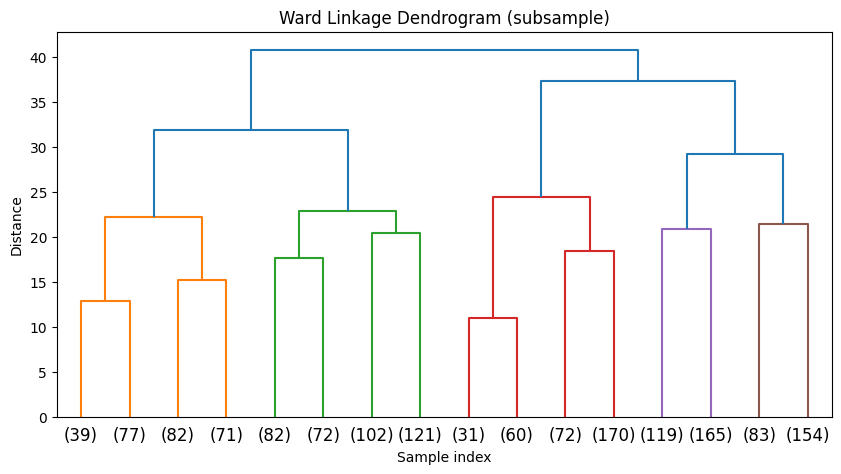

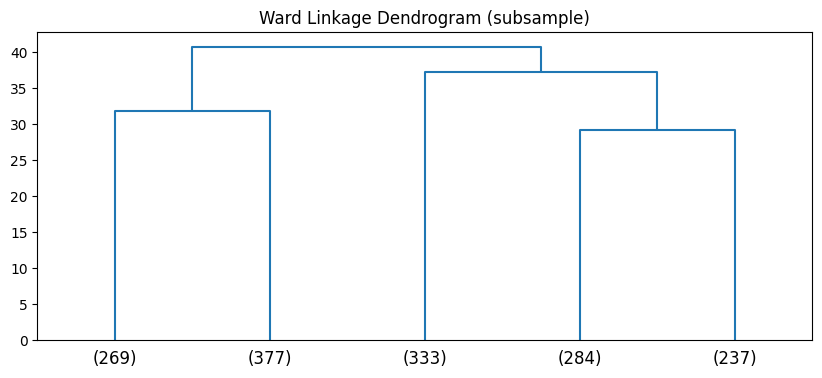

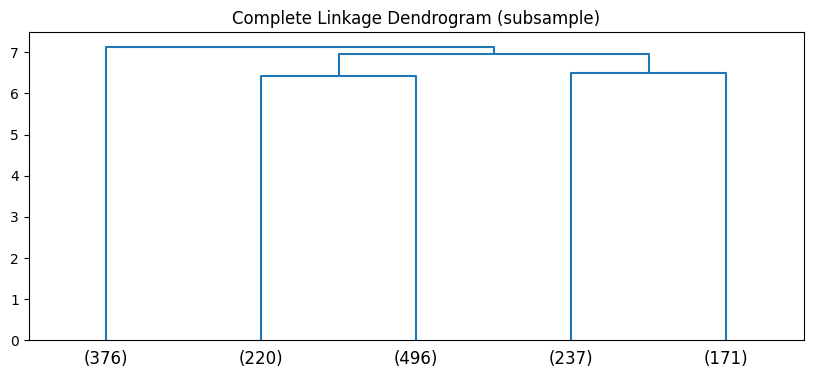

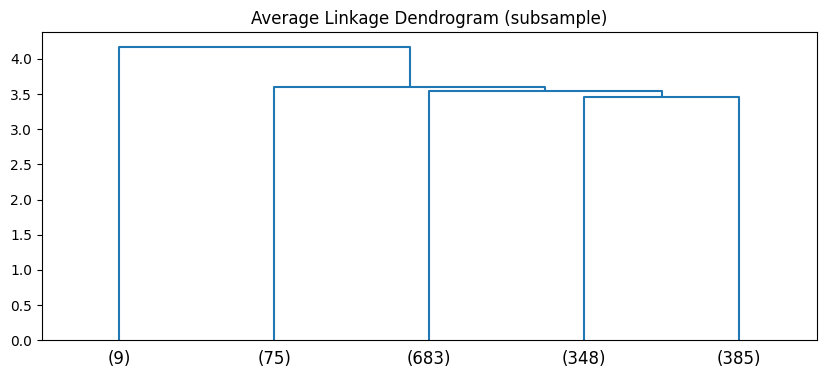

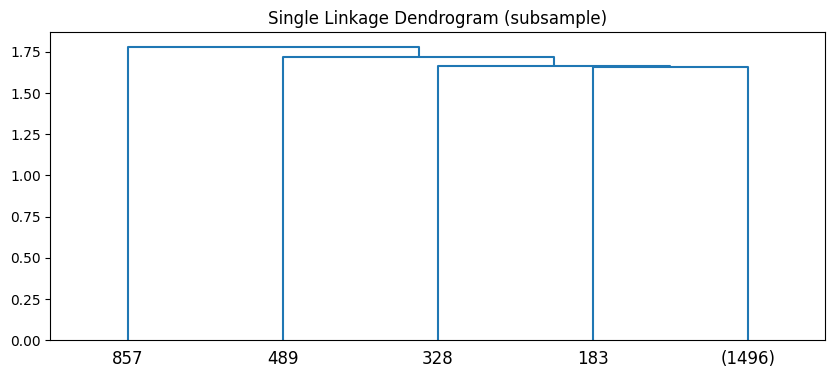


🔍 DBSCAN Cluster Means (numeric features, full data):
                patient_id    age  tumor_size_mm  healthcare_costs  \
dbscan_cluster                                                       
-1                83435.63  42.73          42.16          73140.48   
 0                83752.03  69.46          42.00          72445.51   

                incidence_rate_per_100k  mortality_rate_per_100k  
dbscan_cluster                                                    
-1                                34.76                    17.10  
 0                                34.53                    17.02  

🔍 HAC Cluster Means (Ward, subsample only):
             patient_id    age  tumor_size_mm  healthcare_costs  \
hac_cluster                                                       
0.0            91007.28  74.46          48.64          64109.18   
1.0            87326.44  69.13          42.37          80843.41   
2.0            63600.13  58.61          32.15          81726.34   

             in

In [7]:
# If there is a label/target column, drop it for clustering
target_col = "survival_5_years"  
if target_col in df.columns:
    X = df.drop(columns=[target_col])
else:
    X = df.copy()

# Numeric only & drop missing rows
X = X.select_dtypes(include=[np.number]).dropna()
df_cluster = df.loc[X.index].copy()
print("Numeric X shape after dropna:", X.shape)

# ================================
# 2️⃣ FEATURE SCALING
# ================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# 3️⃣ DBSCAN ON FULL DATA
# ==========================================
eps = 0.6        
min_samples = 10 

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_scaled)

df_cluster["dbscan_cluster"] = labels_dbscan
print("\n🧱 DBSCAN Cluster Counts (full data):")
print(df_cluster["dbscan_cluster"].value_counts().sort_index())

# ==========================================
# 4️⃣ HIERARCHICAL CLUSTERING ON SUBSAMPLE
# ==========================================
# HAC is O(n^2), so we use a random subsample to avoid MemoryError
max_hac_n = 1500       # you can lower to 1000 if still heavy
if len(X_scaled) > max_hac_n:
    idx_hac = np.random.choice(len(X_scaled), size=max_hac_n, replace=False)
else:
    idx_hac = np.arange(len(X_scaled))

X_hac = X_scaled[idx_hac]
index_hac = df_cluster.index[idx_hac]

print("\nUsing", len(X_hac), "rows for HAC and dendrograms")

# HAC with Ward linkage on the subsample
hac = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_hac = hac.fit_predict(X_hac)

# Store HAC labels ONLY for the subsample
df_cluster["hac_cluster"] = np.nan
df_cluster.loc[index_hac, "hac_cluster"] = labels_hac

print("\n🌲 HAC (Ward) Cluster Counts on subsample:")
print(df_cluster.loc[index_hac, "hac_cluster"].value_counts().sort_index())

# ==========================================
# 5️⃣ DENDROGRAMS (ALSO ON SUBSAMPLE)
# ==========================================
# We can reuse X_hac for dendrograms (or even take a smaller subset)
X_dend = X_hac  # or X_hac[:500] to make it even smaller

# Ward linkage dendrogram
plt.figure(figsize=(10, 5))
Z_ward = linkage(X_dend, method="ward")
plt.title("Ward Linkage Dendrogram (subsample)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(Z_ward, truncate_mode="level", p=3)
plt.show()

# Compare linkage methods on the same subsample
methods = ["ward", "complete", "average", "single"]

for method in methods:
    plt.figure(figsize=(10, 4))
    Z = linkage(X_dend, method=method)
    plt.title(f"{method.capitalize()} Linkage Dendrogram (subsample)")
    dendrogram(Z, truncate_mode="lastp", p=5)
    plt.show()

# ==========================================
# 6️⃣ CLUSTER SUMMARIES
# ==========================================
print("\n🔍 DBSCAN Cluster Means (numeric features, full data):")
print(df_cluster.groupby("dbscan_cluster")[X.columns].mean().round(2))

print("\n🔍 HAC Cluster Means (Ward, subsample only):")
print(
    df_cluster.loc[index_hac]
    .groupby("hac_cluster")[X.columns]
    .mean()
    .round(2)
)

## Third Dataset: Diabetes

In [8]:
# 1) Load Dataset
URL = "https://raw.githubusercontent.com/muathdb/Week4/main/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(URL)

df.columns = (
    pd.Index(df.columns)
    .astype(str).str.strip()
    .str.replace(r"\s+", "_", regex=True)
    .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
    .str.lower()
)
print(f"Rows: {len(df):,}  |  Columns: {df.shape[1]}")

Rows: 253,680  |  Columns: 22


Filtered X shape after numeric+dropna: (253680, 21)

🧱 DBSCAN Cluster Counts (full data):
dbscan_cluster
-1      187117
 0         465
 1         192
 2        4317
 3         277
         ...  
 466         3
 467        10
 468         8
 469        12
 470        12
Name: count, Length: 472, dtype: int64

Using 1500 rows for HAC and dendrograms

🌲 HAC Cluster Counts (Ward, subsample):
hac_cluster
0.0     359
1.0    1033
2.0     108
Name: count, dtype: int64


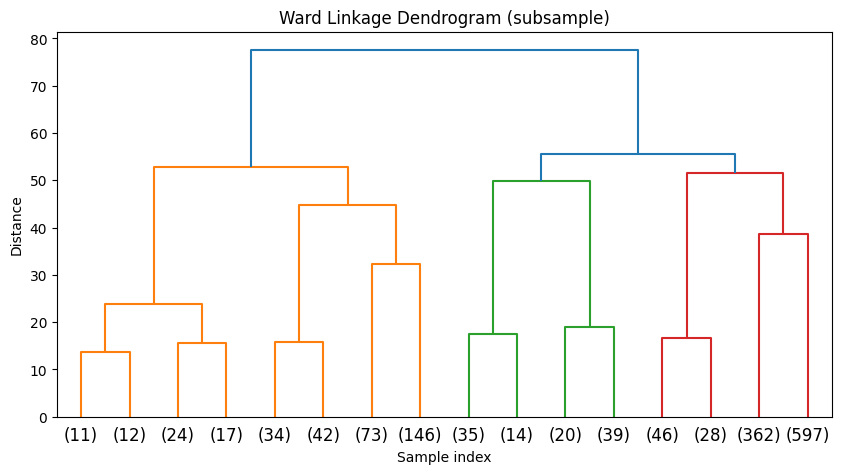

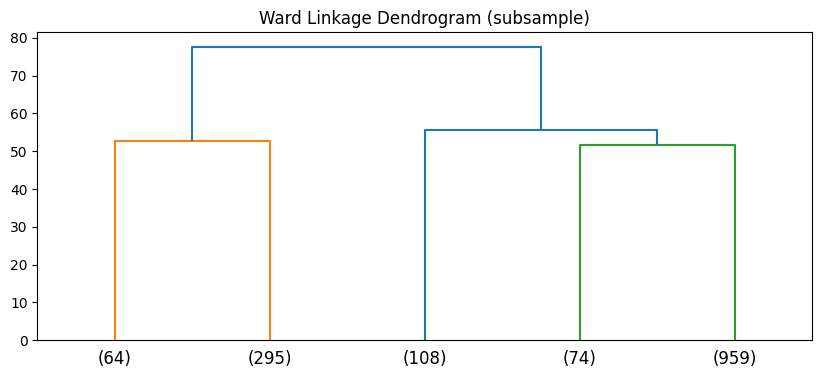

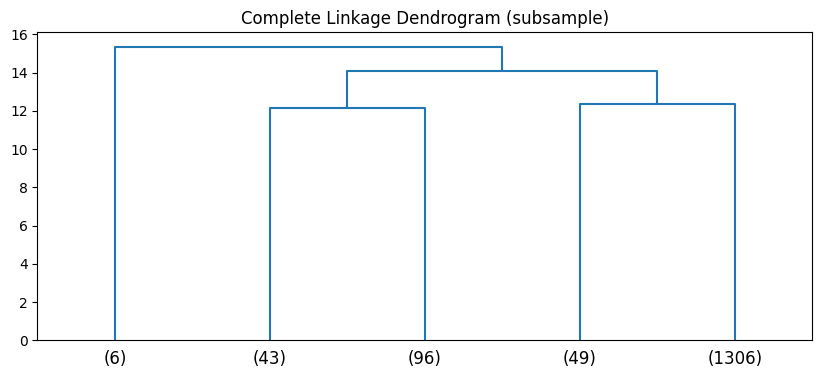

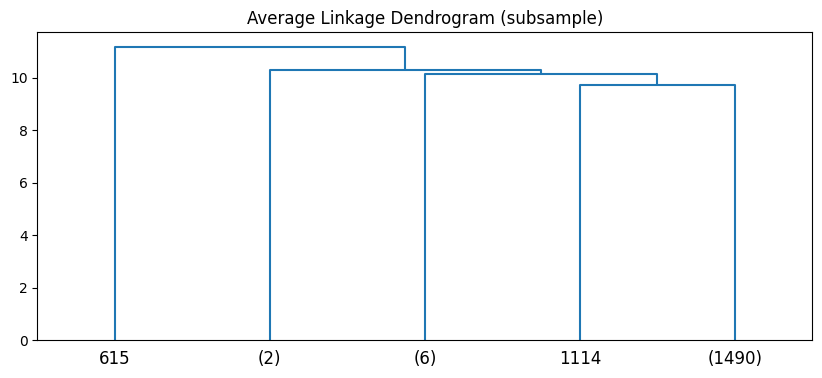

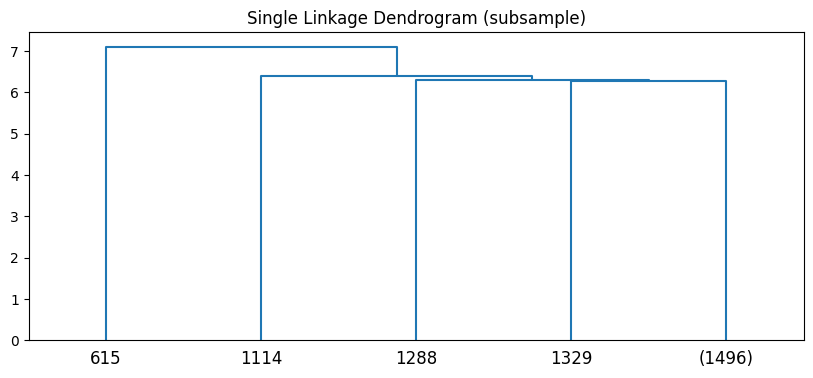


🔍 DBSCAN Cluster Means (numeric features, full data):
                highbp  highchol  cholcheck    bmi  smoker  stroke  \
dbscan_cluster                                                       
-1                0.49      0.46       0.95  29.21     0.5    0.06   
 0                1.00      1.00       1.00  27.80     1.0    0.00   
 1                0.00      0.00       1.00  27.23     1.0    0.00   
 2                0.00      0.00       1.00  25.20     0.0    0.00   
 3                0.00      1.00       1.00  26.04     1.0    0.00   
...                ...       ...        ...    ...     ...     ...   
 466              0.00      0.00       1.00  26.00     0.0    0.00   
 467              0.00      0.00       1.00  27.30     1.0    0.00   
 468              0.00      1.00       1.00  24.25     0.0    0.00   
 469              0.00      1.00       1.00  29.08     1.0    0.00   
 470              0.00      0.00       1.00  20.83     0.0    0.00   

                heartdiseaseoratta

In [9]:
# Drop the label column for clustering
target_col = "diabetes_012"  
if target_col in df.columns:
    X = df.drop(columns=[target_col])
else:
    X = df.copy()

# Keep numeric only, drop rows with NA values
X = X.select_dtypes(include=[np.number]).dropna()
df_cluster = df.loc[X.index].copy()
print("Filtered X shape after numeric+dropna:", X.shape)

# ==========================================
# 2️⃣ FEATURE SCALING
# ==========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# 3️⃣ DBSCAN ON FULL DATA
# ==========================================
eps = 0.5       
min_samples = 10 

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_scaled)

df_cluster["dbscan_cluster"] = labels_dbscan
print("\n🧱 DBSCAN Cluster Counts (full data):")
print(df_cluster["dbscan_cluster"].value_counts().sort_index())

# ==========================================
# 4️⃣ HIERARCHICAL CLUSTERING (SUBSAMPLED)
# ==========================================
# HAC is O(n^2) — use subsample to prevent MemoryError
max_hac_n = 1500  # reduce to ~1000 if still slow

if len(X_scaled) > max_hac_n:
    idx_hac = np.random.choice(len(X_scaled), size=max_hac_n, replace=False)
else:
    idx_hac = np.arange(len(X_scaled))

X_hac = X_scaled[idx_hac]
index_hac = df_cluster.index[idx_hac]

print("\nUsing", len(X_hac), "rows for HAC and dendrograms")

# HAC with Ward linkage (common for numeric data)
hac_ward = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_hac = hac_ward.fit_predict(X_hac)

df_cluster["hac_cluster"] = np.nan
df_cluster.loc[index_hac, "hac_cluster"] = labels_hac
print("\n🌲 HAC Cluster Counts (Ward, subsample):")
print(df_cluster.loc[index_hac, "hac_cluster"].value_counts().sort_index())

# ==========================================
# 5️⃣ DENDROGRAM (Ward + other linkages)
# ==========================================
# For dendrogram visualization (use the same subsample)
X_dend = X_hac  # Optionally downsample further here

plt.figure(figsize=(10, 5))
Z = linkage(X_dend, method="ward")
plt.title("Ward Linkage Dendrogram (subsample)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(Z, truncate_mode="level", p=3)
plt.show()

# Compare linkage methods
methods = ["ward", "complete", "average", "single"]
for method in methods:
    plt.figure(figsize=(10, 4))
    Z = linkage(X_dend, method=method)
    plt.title(f"{method.capitalize()} Linkage Dendrogram (subsample)")
    dendrogram(Z, truncate_mode="lastp", p=5)
    plt.show()

# ==========================================
# 6️⃣ CLUSTER SUMMARIES
# ==========================================
print("\n🔍 DBSCAN Cluster Means (numeric features, full data):")
print(df_cluster.groupby("dbscan_cluster")[X.columns].mean().round(2))

print("\n🔍 HAC Cluster Means (Ward, subsample only):")
print(
    df_cluster.loc[index_hac]
    .groupby("hac_cluster")[X.columns]
    .mean()
    .round(2)
)